## The Three Point Line: Adapt to the new style of play or fall behind

We see the success of the three-point line in the recent years with the uprising of NBA teams like the Golden State Warriors, Houston Rockets, even LeBron James had the Cleveland Cavaliers roster completely revamped halfway during the season to include multiple deadly three point shooters. Not only has the three-point line assisted these teams, but we see crazy records being broken, like Stephen Curry's 402 threes in the 2015-2016 season, the same season he held the title of unanimous MVP for the first time in NBA history. Stephen Curry isn't the only player to be recognized for his amazing shooting, other players like James Harden, Klay Thompson, Kevin Durant, and many others are all in talks about their shooting revolutionizing the game of basketball as we know it. Even players that are known for their athleticism, seem to be shying away from taking the ball all the way to the rack, and instead looking to find ways to extend their range, and shooting the three ball.It seems like nowadays the game of basketball is centered around the three-point line. What I want to tackle in this project, is how exactly has the three-point line changed the game of basketball. Is the team that makes the most threes the one that eventually ends up winning? Are teams being forced to adapt to this playstyle? Does shooting threes allow for an increase in other stats, like rebounds and assists? Does the ability to make threes make you a more valuable player to your team? All these questions I hope to answer with the figures and datasets that I choose to present. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
nba = pd.read_csv('Seasons_Stats.csv')

In [4]:
nba_sorted = nba[["Year","Player","Age","G","PTS","FG","FGA","3P","3PA","2P","2PA","FT","FTA","FT%","PER","TS%","3PAr","FTr","ORB","DRB","TRB","AST","WS","STL","BLK","TOV"]]

In [5]:
nba_sorted = nba_sorted.set_index(["Player"])

At first, I wanted to do analyze these stats with only player's efficiencies, but I realized that stats mean absolutely nothing to organizations and players(unless you're Russell Westbrook), and what these teams and players want the most are wins. In the initial csv, there lacked the data that I wanted so I decided to turn to data that provided me with the stats that the teams come up with alongside the number of wins they get per season. This would be the best way to be able to compare the utilization of the 3 point line and how successful it makes a team.

In [6]:
teams = ["ATL","NJN","BOS","CHA","CHI","CLE","DAL","DEN", "DET","GSW", "HOU","IND","LAC","LAL","MEM","MIA","MIL","MIN","NOH","NYK","OKC","ORL","PHI","PHO","POR","SAC","SAS","TOR","UTA","WAS"]

urls = []

for team in teams:
    urls.append("http://www.basketball-reference.com/teams/" + team + "/stats_basic_totals.html")

In [10]:
from bs4 import BeautifulSoup
from requests import get
dfs = []
for url in urls:
    team_data = get(url)
    soup = BeautifulSoup(team_data.content, 'html.parser')
    table = soup.findAll('table')[0]

    columns = table.findAll('thead')[0].findAll('th')
    headers = []
    for column in columns:
        header = column.getText().strip()
        if (len(header) > 0):
            headers.append(header)
    rows = table.findAll('tbody')[0].findAll('tr')
    team = []
    for row in rows[0:6]:
        season = row.findAll('th')[0].getText()
        cells = row.findAll('td')
        data = [season]
        for cell in cells:
            c = cell.getText().strip()
            if (len(c) > 0):
                data.append(c)
        
        team.append(data)
    
    df = pd.DataFrame(columns=headers, data=team)
    dfs.append(df)

In [61]:
teamstats = []

for df in dfs:
    df = df[['Season', 'Tm', 'W', 'L', '3PA', '3P%',"FGA"]]
    df['Season'] = df['Season'].str[:4]
    df['Win/Loss'] = (df['W'].astype(float) / (df['W'].astype(float) + df['L'].astype(float))) * 100
    df['3P%'] = df['3P%'].astype(float) * 100
    df['3PA%'] = (df['3PA'].astype(float) / df["FGA"].astype(float)) * 100
    print(df)
    teamstats.append(df)

/Users/ryanlai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/ryanlai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/ryanlai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

  Season   Tm   W   L   3PA   3P%   FGA   Win/Loss       3PA%
0   2017  ATL  24  58  2544  36.0  7014  29.268293  36.270317
1   2016  ATL  43  39  2137  34.1  6918  52.439024  30.890431
2   2015  ATL  48  34  2326  35.0  6923  58.536585  33.598151
3   2014  ATL  60  22  2152  38.0  6699  73.170732  32.124198
4   2013  ATL  38  44  2116  36.3  6688  46.341463  31.638756
5   2012  ATL  44  38  1901  37.1  6644  53.658537  28.612282
  Season   Tm   W   L   3PA   3P%   FGA   Win/Loss       3PA%
0   2017  BRK  28  54  2924  35.6  7114  34.146341  41.102052
1   2016  BRK  20  62  2591  33.8  6987  24.390244  37.083154
2   2015  BRK  21  61  1508  35.2  6920  25.609756  21.791908
3   2014  BRK  38  44  1633  33.1  6804  46.341463  24.000588
4   2013  BRK  44  38  1922  36.9  6391  53.658537  30.073541
5   2012  BRK  49  33  1760  35.7  6544  59.756098  26.894866
  Season   Tm   W   L   3PA   3P%   FGA   Win/Loss       3PA%
0   2017  BOS  55  27  2492  37.7  6975  67.073171  35.727599
1   2016

5   2012  NYK  54  28  2371  37.6  6689  65.853659  35.446255
  Season   Tm   W   L   3PA   3P%   FGA   Win/Loss       3PA%
0   2017  OKC  48  34  2490  35.4  7220  58.536585  34.487535
1   2016  OKC  47  35  2116  32.7  7169  57.317073  29.515972
2   2015  OKC  55  27  1945  34.9  7082  67.073171  27.463993
3   2014  OKC  45  37  1864  33.9  7119  54.878049  26.183453
4   2013  OKC  59  23  1839  36.1  6782  71.951220  27.115895
5   2012  OKC  60  22  1588  37.7  6504  73.170732  24.415744
  Season   Tm   W   L   3PA   3P%   FGA   Win/Loss       3PA%
0   2017  ORL  25  57  2405  35.1  7042  30.487805  34.152229
1   2016  ORL  29  53  2139  32.8  7133  35.365854  29.987383
2   2015  ORL  35  47  1818  35.0  7120  42.682927  25.533708
3   2014  ORL  25  57  1598  34.7  6792  30.487805  23.527680
4   2013  ORL  23  59  1596  35.3  6784  28.048780  23.525943
5   2012  ORL  20  62  1537  32.9  6904  24.390244  22.262457
  Season   Tm   W   L   3PA   3P%   FGA   Win/Loss       3PA%
0   2017

In [35]:
teamstats

[  Season   Tm   W   L   3PA   3P%   Win/Loss
 0   2017  ATL  24  58  2544  36.0  29.268293
 1   2016  ATL  43  39  2137  34.1  52.439024
 2   2015  ATL  48  34  2326  35.0  58.536585
 3   2014  ATL  60  22  2152  38.0  73.170732
 4   2013  ATL  38  44  2116  36.3  46.341463
 5   2012  ATL  44  38  1901  37.1  53.658537,
   Season   Tm   W   L   3PA   3P%   Win/Loss
 0   2017  BRK  28  54  2924  35.6  34.146341
 1   2016  BRK  20  62  2591  33.8  24.390244
 2   2015  BRK  21  61  1508  35.2  25.609756
 3   2014  BRK  38  44  1633  33.1  46.341463
 4   2013  BRK  44  38  1922  36.9  53.658537
 5   2012  BRK  49  33  1760  35.7  59.756098,
   Season   Tm   W   L   3PA   3P%   Win/Loss
 0   2017  BOS  55  27  2492  37.7  67.073171
 1   2016  BOS  53  29  2742  35.9  64.634146
 2   2015  BOS  48  34  2142  33.5  58.536585
 3   2014  BOS  40  42  2021  32.7  48.780488
 4   2013  BOS  25  57  1729  33.3  30.487805
 5   2012  BOS  41  40  1390  35.8  50.617284,
   Season   Tm   W   L   3PA   

This dataset provides us with all the stats that we need to compare how much a team is using the three point line and how many wins they are getting a season. I only chose to use the last 5 seasons in the NBA, because this is when we are seeing the uprising of the three point line. In the 2012-2013 season, we saw Stephen Curry break the record for most threes in a single NBA season, and we only saw this number increasing every season. After Stephen Curry led the Golden State Warriors to their first championship in 2014-2015 season, teams were questioning whether or not the success at the three was the secret. In the 2015-2016 season, the Golden State Warriors broke the record for the most wins in a season, and teams were convinced that hte three point line was the secret.

In [13]:
import sys                             
import pandas as pd                    
import matplotlib.pyplot as plt        
import datetime as dt                  
import numpy as np                     
import seaborn.apionly as sns         
from pandas_datareader import wb, data as web  

from plotly.offline import iplot, iplot_mpl  
import plotly.graph_objs as go               
import plotly                                
import cufflinks as cf                      
cf.set_config_file(offline=True, offline_show_link=False)

%matplotlib inline             
plotly.offline.init_notebook_mode(connected=True)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [285]:
for df in teamstats:
    data = []
    data.append(go.Bar(
        x = df['Season'],
        y = df['Win/Loss'],
        name= 'Win Loss Percentage',
        marker = dict(
            color = "rgb(green)")
    ))
    data.append(go.Bar(
        x = df['Season'],
        y = df['3PA%'],
        name= '3 Point Attempt %',
        marker = dict(
            color = "rgb(55,83,109)")
    ))
    layout = dict(title= 'Win/Loss VS 3 Point Attempt % For '+ df['Tm'][0],xaxis = dict(title = 'Season')) 
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='basic-line')

Looking at these graphs, we definitely see a general increase in the 3 point attempt % amongst teams, and despite this we still don't see an increase of wins in teams that have dramatically changed their playstyle. Although for some teams the season with the highest wins is also the season where they have the most 3 point attempts, this isn't a trend amongst most organizations. For teams like the Philadelphia 76ers, we see the exact same percentage of 3 point attempts from the 2017 and the 2016 season but the win rate for the 76ers nearly doubled in the 2017 season. The team with the best NBA record in 2017 the Houston Rockets shot an astounding 50% of their shots from behind the three point line, the team with the second highest percentage of 3 point shots attempted was the Brooklyn Nets, but they only had a 34% win rate.  With these stats, its probably safe to say that the # of attempted threes doesn't affect the outcome of the game.

In [284]:
for df in teamstats:
    data = []
    data.append(go.Bar(
        x = df['Season'],
        y = df['Win/Loss'],
        name= 'Win Loss Percentage',
        marker = dict(
            color = "green")
        ))
    data.append(go.Bar(
        x = df['Season'],
        y = df['3P%'],
        name= '3 Point Percentage Made',
        marker = dict(
            color = "blue")
    ))
    layout = dict(title= 'Win/Loss VS 3 Point Percentage Made for '+ df['Tm'][0],xaxis = dict(title = 'Season'), colorway = 'red') 
    fig = dict(data=data, layout=layout,)
    iplot(fig, filename='basic-line')

Looking back at the teams that were discussed in the previous graph, the Houston Rockets aren't shooting lights out from three. They are only making 36.2% of their threes, and the Brooklyn Nets that have a 34% win rate are only 0.6% behind the Rockets in terms of three pointers made, sitting at a solid 35.6% 3PM. It also seems there's a lack of correlation between 3 pointers made and the numbers of wins a team gets.

Ever since we've been more NBA athletes taking the three a lot of articles have shown up about the efficiency of this tactic. The formula for efficiency for a singular player is (PTS + REB + AST + STL + BLK - Missed FG - Missed FT - TO) / GP. To convert this to how efficient a team is simply use the same formula, and see how efficient they are playing in total.

In [74]:
teamstats = []

for df in dfs:
    df = df[['Season', 'Tm', 'W', 'L', '3PA', '3P%',"FGA","PTS","TRB","AST","STL","BLK","FG","FT","FTA","TOV"]]
    df['Season'] = df['Season'].str[:4]
    df['Win/Loss'] = (df['W'].astype(float) / (df['W'].astype(float) + df['L'].astype(float))) * 100
    df['3P%'] = df['3P%'].astype(float) * 100
    df['3PA%'] = (df['3PA'].astype(float) / df["FGA"].astype(float)) * 100
    df['Missed FG'] = df["FGA"].astype(float) - df['FG'].astype(float)
    df["Missed FT"] = df['FTA'].astype(float) - df['FT'].astype(float)
    df['Efficiency'] = (df['PTS'].astype(float) + df["TRB"].astype(float) + df["AST"].astype(float) + df["STL"].astype(float) + df['BLK'].astype(float) - df["Missed FG"].astype(float) - df["Missed FT"].astype(float) - df["TOV"].astype(float))/82
    print(df)
    teamstats.append(df)

/Users/ryanlai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/ryanlai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/ryanlai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

  Season   Tm   W   L   3PA   3P%   FGA   PTS   TRB   AST     ...      BLK  \
0   2017  ATL  24  58  2544  36.0  7014  8475  3435  1946     ...      348   
1   2016  ATL  43  39  2137  34.1  6918  8459  3635  1938     ...      397   
2   2015  ATL  48  34  2326  35.0  6923  8433  3451  2100     ...      486   
3   2014  ATL  60  22  2152  38.0  6699  8409  3326  2111     ...      380   
4   2013  ATL  38  44  2116  36.3  6688  8282  3278  2041     ...      326   
5   2012  ATL  44  38  1901  37.1  6644  8032  3351  2007     ...      369   

     FG    FT   FTA   TOV   Win/Loss       3PA%  Missed FG  Missed FT  \
0  3130  1298  1654  1276  29.268293  36.270317     3884.0      356.0   
1  3123  1484  2039  1294  52.439024  30.890431     3795.0      555.0   
2  3168  1282  1638  1226  58.536585  33.598151     3755.0      356.0   
3  3121  1349  1735  1167  73.170732  32.124198     3578.0      386.0   
4  3061  1392  1782  1251  46.341463  31.638756     3627.0      390.0   
5  3084  1158  

  Season   Tm   W   L   3PA   3P%   FGA   PTS   TRB   AST     ...      BLK  \
0   2017  DEN  46  36  2536  37.1  7102  9020  3650  2058     ...      404   
1   2016  DEN  40  42  2365  36.8  7194  9161  3803  2077     ...      323   
2   2015  DEN  33  49  1943  33.8  7003  8355  3659  1858     ...      395   
3   2014  DEN  30  52  2032  32.5  7158  8320  3665  1788     ...      367   
4   2013  DEN  36  46  1959  35.8  7042  8559  3726  1838     ...      459   
5   2012  DEN  57  25  1518  34.3  6983  8704  3693  2002     ...      533   

     FG    FT   FTA   TOV   Win/Loss       3PA%  Missed FG  Missed FT  \
0  3338  1404  1833  1227  56.097561  35.708251     3764.0      429.0   
1  3377  1537  1986  1226  48.780488  32.874618     3817.0      449.0   
2  3093  1513  1974  1202  40.243902  27.745252     3910.0      461.0   
3  3099  1462  1991  1166  36.585366  28.387818     4059.0      529.0   
4  3147  1563  2154  1305  43.902439  27.818801     3895.0      591.0   
5  3339  1505  

  Season   Tm   W   L   3PA   3P%   FGA   PTS   TRB   AST     ...      BLK  \
0   2017  MEM  22  60  2152  35.2  6788  8145  3323  1767     ...      396   
1   2016  MEM  43  39  2169  35.4  6854  8239  3507  1744     ...      344   
2   2015  MEM  42  40  1521  33.1  6859  8126  3413  1697     ...      350   
3   2014  MEM  55  27  1246  33.9  6763  8062  3490  1777     ...      347   
4   2013  MEM  50  32  1147  35.3  6723  7884  3476  1792     ...      375   
5   2012  MEM  56  26  1107  34.5  6679  7659  3504  1715     ...      436   

     FG    FT   FTA   TOV   Win/Loss       3PA%  Missed FG  Missed FT  \
0  3013  1361  1732  1227  26.829268  31.703005     3775.0      371.0   
1  2984  1504  1918  1059  52.439024  31.645754     3870.0      414.0   
2  3019  1584  2024  1090  51.219512  22.175244     3840.0      440.0   
3  3097  1445  1869  1094  67.073171  18.423776     3666.0      424.0   
4  3122  1235  1666  1124  60.975610  17.060836     3601.0      431.0   
5  2964  1349  

  Season   Tm   W   L   3PA   3P%   FGA   PTS   TRB   AST     ...      BLK  \
0   2017  ORL  25  57  2405  35.1  7042  8479  3414  1921     ...      400   
1   2016  ORL  29  53  2139  32.8  7133  8288  3541  1820     ...      396   
2   2015  ORL  35  47  1818  35.0  7120  8369  3552  1933     ...      417   
3   2014  ORL  25  57  1598  34.7  6792  7847  3429  1692     ...      314   
4   2013  ORL  23  59  1596  35.3  6784  7914  3448  1726     ...      350   
5   2012  ORL  20  62  1537  32.9  6904  7718  3502  1871     ...      358   

     FG    FT   FTA   TOV   Win/Loss       3PA%  Missed FG  Missed FT  \
0  3182  1271  1678  1192  30.487805  34.152229     3860.0      407.0   
1  3139  1309  1753  1091  35.365854  29.987383     3994.0      444.0   
2  3242  1249  1649  1155  42.682927  25.533708     3878.0      400.0   
3  3076  1141  1565  1221  30.487805  23.527680     3716.0      424.0   
4  3022  1307  1714  1222  28.048780  23.525943     3762.0      407.0   
5  3093  1026  

  Season   Tm   W   L   3PA   3P%   FGA   PTS   TRB   AST     ...      BLK  \
0   2017  UTA  48  34  2425  36.6  6797  8540  3547  1839     ...      420   
1   2016  UTA  51  31  2128  37.2  6515  8258  3545  1651     ...      410   
2   2015  UTA  40  42  1956  35.5  6593  8010  3545  1555     ...      425   
3   2014  UTA  38  44  1781  34.3  6492  7801  3605  1632     ...      489   
4   2013  UTA  25  57  1577  34.4  6652  7791  3381  1664     ...      366   
5   2012  UTA  43  39  1385  36.6  6710  8038  3446  1859     ...      515   

     FG    FT   FTA   TOV   Win/Loss       3PA%  Missed FG  Missed FT  \
0  3139  1375  1766  1205  58.536585  35.677505     3658.0      391.0   
1  3033  1401  1875  1118  62.195122  32.663085     3482.0      474.0   
2  2957  1402  1885  1224  48.780488  29.667830     3636.0      483.0   
3  2900  1391  1929  1256  46.341463  27.433765     3592.0      538.0   
4  2951  1346  1803  1200  30.487805  23.707156     3701.0      457.0   
5  3046  1439  

In [282]:
for df in teamstats:
    data = []
    data.append(go.Bar(
        x = df['Season'],
        y = df['Efficiency'],
        name= 'Efficiency',
        marker = dict(
            color = "purple")
    ))
    data.append(go.Bar(
        x = df['Season'],
        y = df['3PA%'],
        name= '3 Point Attempt %',
        marker = dict(
            color = "rgb(55,83,109)")
    ))
    layout = dict(title= '3 Point Attempt % VS Efficiency For '+ df['Tm'][0],xaxis = dict(title = 'Season')) 
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='basic-line')

In [279]:
for df in teamstats:
    data = []
    data.append(go.Bar(
        x = df['Season'],
        y = df['Efficiency'],
        name = 'Efficiency',
        marker = dict(
            color = "purple")
        
        ))
    data.append(go.Bar(
        x = df['Season'],
        y = df['3P%'],
        name = '3 Point Percentage Made',
        marker = dict(
            color = "blue")
    ))
    layout = dict(title= 'Efficiency VS 3 Point Percentage Made for '+ df['Tm'][0],xaxis = dict(title = 'Season')) 
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='basic-line')

In theory, if the 3 point shot was accurate enough the efficiency should increase greatly with an increased amount of shots. The function of efficiency is based off of points and missed FG, a three pointer inherently increases the amount of points you make, and if it is accurate enough, the lack of efficiency of having a missed FG should be made up by the number of points. However, it seems that when Houston increased their 3 point attempted shooting from 46% to 50% we actually saw a decrease in efficiency. The Houston Rockets hit their peak efficiency at 46% 3P FG attempted. For very few teams do we see a peak efficiency correlated with a peak 3 point field game attempted. The lack of correlation made me think actually how important is efficiency with how much a team wins.

In [278]:
for df in teamstats:
    data = []
    data.append(go.Bar(
        x = df['Season'],
        y = df['Efficiency'],
        name= 'Efficiency',
        marker = dict(
            color = "purple")
    ))
    data.append(go.Bar(
        x = df['Season'],
        y = df['Win/Loss'],
        name= 'Win Loss Percentage',
        marker = dict(
            color = "green")
    ))
    layout = dict(title= 'Efficiency VS Win/Loss For '+ df['Tm'][0],xaxis = dict(title = 'Season')) 
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='basic-line')

Once again, there seems to be a lack of teams that have their season of highest efficiency as the same season as their highest win loss percentage. This makes me think that efficiency isn't necessarily the best way to determine how good a team is, but it is very possible for efficiency to be a good metric as to important a player is to a team.

Now let's see how % of 3 points attempted, and % of 3 points made affected the efficiency of a player, for the sake of simplicity I only wanted to target the big names on certain teams, so for this part, I will only be looking at the stats for players Stephen Curry, James Harden, LeBron James, and Kevin Durant.

In [118]:
nba = pd.read_csv('Seasons_Stats.csv')
nba_sorted = nba[["Year","Player","Age","G","PTS","FG","FGA","3P","3PA","2P","2PA","FT","FTA","TRB","AST","STL","BLK","TOV"]]

In [129]:
nba_sorted.set_index("Year", inplace = True)

In [134]:
nba_sorted = nba_sorted.drop(["1950.0","1951.0","1952.0","1953.0","1954.0","1955.0","1956.0","1957.0","1958.0","1959.0","1960.0","1961.0","1962.0","1963.0","1964.0","1965.0","1966.0","1967.0","1968.0","1969.0","1970.0","1971.0","1972.0","1973.0","1974.0","1975.0","1976.0","1977.0","1978.0","1979.0","1980.0","1981.0","1982.0","1983.0","1984.0","1985.0","1986.0","1987.0","1988.0","1989.0","1990.0","1991.0","1992.0","1993.0","1994.0","1995.0","1996.0","1997.0","1998.0","1999.0","2000.0","2001.0","2002.0","2003.0","2004.0","2005.0","2006.0","2007.0","2008.0","2009.0","2010.0","2011.0","nan"])

In [136]:
nba_sorted_player = nba_sorted.set_index("Player")

In [186]:
steph_curry = nba_sorted_player.loc["Stephen Curry"]
lj = nba_sorted_player.loc["LeBron James"]
jh = nba_sorted_player.loc["James Harden"]
kd = nba_sorted_player.loc["Kevin Durant"]

In [143]:
type(steph_curry)

pandas.core.frame.DataFrame

In [144]:
steph_curry

,Age,G,PTS,FG,FGA,3P,3PA,2P,2PA,FT,FTA,TRB,AST,STL,BLK,TOV
Player,,,,,,,,,,,,,,,,
Stephen Curry,23.0,26.0,383.0,145.0,296.0,55.0,121.0,90.0,175.0,38.0,47.0,88.0,138.0,39.0,8.0,65.0
Stephen Curry,24.0,78.0,1786.0,626.0,1388.0,272.0,600.0,354.0,788.0,262.0,291.0,314.0,539.0,126.0,12.0,240.0
Stephen Curry,25.0,78.0,1873.0,652.0,1383.0,261.0,615.0,391.0,768.0,308.0,348.0,334.0,666.0,128.0,14.0,294.0
Stephen Curry,26.0,80.0,1900.0,653.0,1341.0,286.0,646.0,367.0,695.0,308.0,337.0,341.0,619.0,163.0,16.0,249.0
Stephen Curry,27.0,79.0,2375.0,805.0,1598.0,402.0,886.0,403.0,712.0,363.0,400.0,430.0,527.0,169.0,15.0,262.0
Stephen Curry,28.0,79.0,1999.0,675.0,1443.0,324.0,789.0,351.0,654.0,325.0,362.0,353.0,523.0,143.0,17.0,239.0


In [257]:
steph_curry["Missed FT"] = steph_curry["FTA"] - steph_curry["FT"]
steph_curry["3PA%"] = steph_curry["3PA"] / steph_curry["FGA"]
steph_curry["3PM%"] = steph_curry["3P"] / steph_curry["3PA"]
steph_curry["Missed FG"] = steph_curry["FGA"] - steph_curry["FG"]
steph_curry['Efficiency'] = (steph_curry['PTS'] + steph_curry["TRB"] + steph_curry["AST"] + steph_curry["STL"] + steph_curry['BLK'] - steph_curry["Missed FG"] - steph_curry["Missed FT"] - steph_curry["TOV"])/steph_curry["G"]


In [258]:
steph_curry = steph_curry.round(4)
steph_curry

,Age,G,PTS,FG,FGA,3P,3PA,2P,2PA,FT,...,TRB,AST,STL,BLK,TOV,Missed FT,Missed FG,Efficiency,3PM%,3PA%
3PA%,,,,,,,,,,,,,,,,,,,,,
0.4088,23.0,26.0,383.0,145.0,296.0,55.0,121.0,90.0,175.0,38.0,...,88.0,138.0,39.0,8.0,65.0,9.0,151.0,16.5769,0.4545,0.4088
0.4323,24.0,78.0,1786.0,626.0,1388.0,272.0,600.0,354.0,788.0,262.0,...,314.0,539.0,126.0,12.0,240.0,29.0,762.0,22.3846,0.4533,0.4323
0.4447,25.0,78.0,1873.0,652.0,1383.0,261.0,615.0,391.0,768.0,308.0,...,334.0,666.0,128.0,14.0,294.0,40.0,731.0,25.0000,0.4244,0.4447
0.4817,26.0,80.0,1900.0,653.0,1341.0,286.0,646.0,367.0,695.0,308.0,...,341.0,619.0,163.0,16.0,249.0,29.0,688.0,25.9125,0.4427,0.4817
0.5468,28.0,79.0,1999.0,675.0,1443.0,324.0,789.0,351.0,654.0,325.0,...,353.0,523.0,143.0,17.0,239.0,37.0,768.0,25.2025,0.4106,0.5468
0.5544,27.0,79.0,2375.0,805.0,1598.0,402.0,886.0,403.0,712.0,363.0,...,430.0,527.0,169.0,15.0,262.0,37.0,793.0,30.6835,0.4537,0.5544


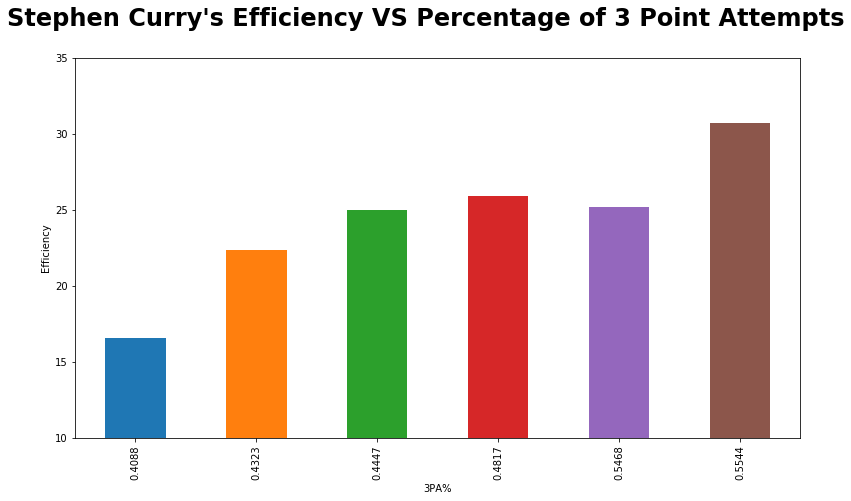

In [260]:
fig, ax = plt.subplots(figsize=(13,7))
steph_curry = steph_curry.sort_values(by="3PA%", ascending = True)
steph_curry.set_index("3PA%", inplace = True)
steph_curry.index,steph_curry["Efficiency"].plot(kind = "bar", alpha = 1.0)
ax.set_xlabel("3PA%")
ax.set_ylabel("Efficiency")
ax.set_ylim(10,35)
fig.suptitle("Stephen Curry's Efficiency VS Percentage of 3 Point Attempts",fontsize = 24, fontweight = "bold")
plt.show()

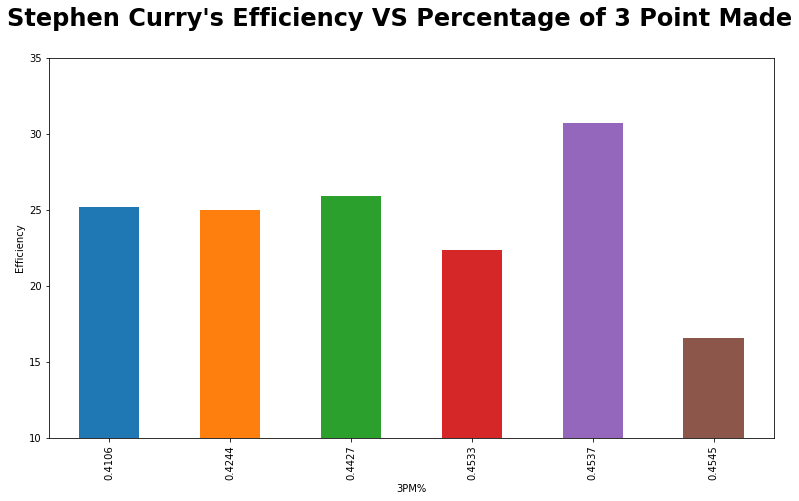

In [261]:
fig, ax = plt.subplots(figsize=(13,7))
steph_curry = steph_curry.sort_values(by="3PM%", ascending = True)
steph_curry.set_index("3PM%", inplace = True)
steph_curry.index,steph_curry["Efficiency"].plot(kind = "bar", alpha = 1.0)
ax.set_xlabel("3PM%")
ax.set_ylabel("Efficiency")
ax.set_ylim(10,35)
fig.suptitle("Stephen Curry's Efficiency VS Percentage of 3 Point Made",fontsize = 24, fontweight = "bold")
plt.show()

In [262]:
lj["Missed FT"] = lj["FTA"] - lj["FT"]
lj["3PA%"] = lj["3PA"] / lj["FGA"]
lj["3PM%"] = lj["3P"] / lj["3PA"]
lj["Missed FG"] = lj["FGA"] - lj["FG"]
lj['Efficiency'] = (lj['PTS'] + lj["TRB"] + lj["AST"] + lj["STL"] + lj['BLK'] - lj["Missed FG"] - lj["Missed FT"] - lj["TOV"])/lj["G"]


In [263]:
lj = lj.round(4)
lj

,Age,G,PTS,FG,FGA,3P,3PA,2P,2PA,FT,...,TRB,AST,STL,BLK,TOV,Missed FT,Missed FG,Efficiency,3PA%,3PM%
3PM%,,,,,,,,,,,,,,,,,,,,,
0.3085,31.0,76.0,1920.0,737.0,1416.0,87.0,282.0,650.0,1134.0,359.0,...,565.0,514.0,104.0,49.0,249.0,132.0,679.0,27.5263,0.1992,0.3085
0.3540,30.0,69.0,1743.0,624.0,1279.0,120.0,339.0,504.0,940.0,375.0,...,416.0,511.0,109.0,49.0,272.0,153.0,655.0,25.3333,0.2651,0.3540
0.3624,27.0,62.0,1683.0,621.0,1169.0,54.0,149.0,567.0,1020.0,387.0,...,492.0,387.0,115.0,50.0,213.0,115.0,548.0,29.8548,0.1275,0.3624
0.3626,32.0,74.0,1954.0,736.0,1344.0,124.0,342.0,612.0,1002.0,358.0,...,640.0,646.0,92.0,44.0,303.0,173.0,608.0,30.9730,0.2545,0.3626
0.3791,29.0,77.0,2089.0,767.0,1353.0,116.0,306.0,651.0,1047.0,439.0,...,533.0,488.0,121.0,26.0,270.0,146.0,586.0,29.2857,0.2262,0.3791
0.4055,28.0,76.0,2036.0,765.0,1354.0,103.0,254.0,662.0,1100.0,403.0,...,610.0,551.0,129.0,67.0,226.0,132.0,589.0,32.1842,0.1876,0.4055


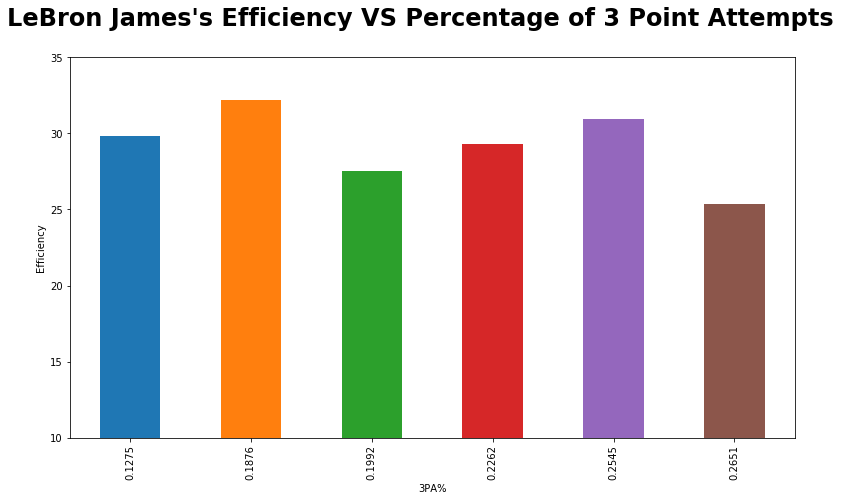

In [264]:
fig, ax = plt.subplots(figsize=(13,7))
lj = lj.sort_values(by="3PA%", ascending = True)
lj.set_index("3PA%", inplace = True)
lj.index,lj["Efficiency"].plot(kind = "bar", alpha = 1.0)
ax.set_xlabel("3PA%")
ax.set_ylabel("Efficiency")
ax.set_ylim(10,35)
fig.suptitle("LeBron James's Efficiency VS Percentage of 3 Point Attempts",fontsize = 24, fontweight = "bold")
plt.show()

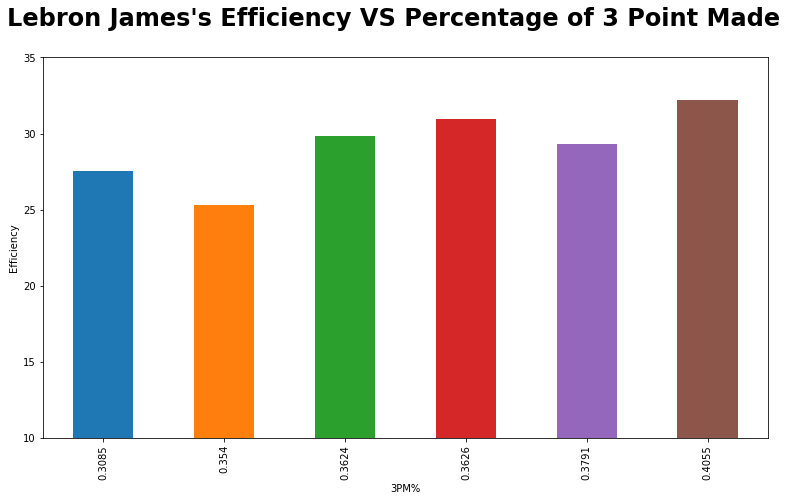

In [265]:
fig, ax = plt.subplots(figsize=(13,7))
lj = lj.sort_values(by="3PM%", ascending = True)
lj.set_index("3PM%", inplace = True)
lj.index,lj["Efficiency"].plot(kind = "bar", alpha = 1.0)
ax.set_xlabel("3PM%")
ax.set_ylabel("Efficiency")
ax.set_ylim(10,35)
fig.suptitle("Lebron James's Efficiency VS Percentage of 3 Point Made",fontsize = 24, fontweight = "bold")
plt.show()

In [266]:
jh["Missed FT"] = jh["FTA"] - jh["FT"]
jh["3PA%"] = jh["3PA"] / jh["FGA"]
jh["3PM%"] = jh["3P"] / jh["3PA"]
jh["Missed FG"] = jh["FGA"] - jh["FG"]
jh['Efficiency'] = (jh['PTS'] + jh["TRB"] + jh["AST"] + jh["STL"] + jh['BLK'] - jh["Missed FG"] - jh["Missed FT"] - jh["TOV"])/jh["G"]
jh = jh.round(4)

In [267]:
jh

,Age,G,PTS,FG,FGA,3P,3PA,2P,2PA,FT,...,TRB,AST,STL,BLK,TOV,Missed FT,Missed FG,Efficiency,3PA%,3PM%
3PM%,,,,,,,,,,,,,,,,,,,,,
0.3466,27.0,81.0,2356.0,674.0,1533.0,262.0,756.0,412.0,777.0,746.0,...,659.0,906.0,120.0,37.0,464.0,135.0,859.0,32.3457,0.4932,0.3466
0.3592,26.0,82.0,2376.0,710.0,1617.0,236.0,657.0,474.0,960.0,720.0,...,501.0,612.0,139.0,51.0,374.0,117.0,907.0,27.8171,0.4063,0.3592
0.3665,24.0,73.0,1851.0,549.0,1205.0,177.0,483.0,372.0,722.0,576.0,...,344.0,446.0,115.0,29.0,265.0,89.0,656.0,24.3151,0.4008,0.3665
0.3683,23.0,78.0,2023.0,585.0,1337.0,179.0,486.0,406.0,851.0,674.0,...,379.0,455.0,142.0,38.0,295.0,118.0,752.0,24.0000,0.3635,0.3683
0.3748,25.0,81.0,2217.0,647.0,1470.0,208.0,555.0,439.0,915.0,715.0,...,459.0,565.0,154.0,60.0,321.0,109.0,823.0,27.1852,0.3776,0.3748
0.3904,22.0,62.0,1044.0,309.0,629.0,114.0,292.0,195.0,337.0,312.0,...,252.0,229.0,62.0,15.0,137.0,57.0,320.0,17.5484,0.4642,0.3904


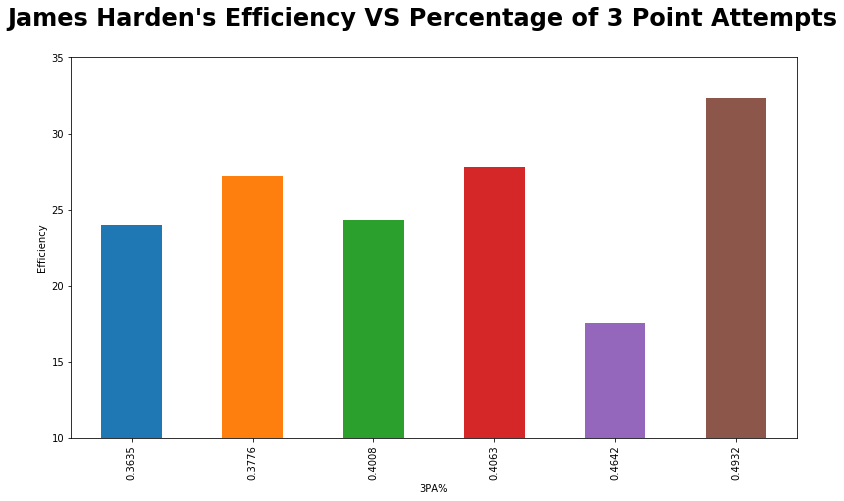

In [268]:
fig, ax = plt.subplots(figsize=(13,7))
jh = jh.sort_values(by="3PA%", ascending = True)
jh.set_index("3PA%", inplace = True)
jh.index,jh["Efficiency"].plot(kind = "bar", alpha = 1.0)
ax.set_xlabel("3PA%")
ax.set_ylabel("Efficiency")
ax.set_ylim(10,35)
fig.suptitle("James Harden's Efficiency VS Percentage of 3 Point Attempts",fontsize = 24, fontweight = "bold")
plt.show()

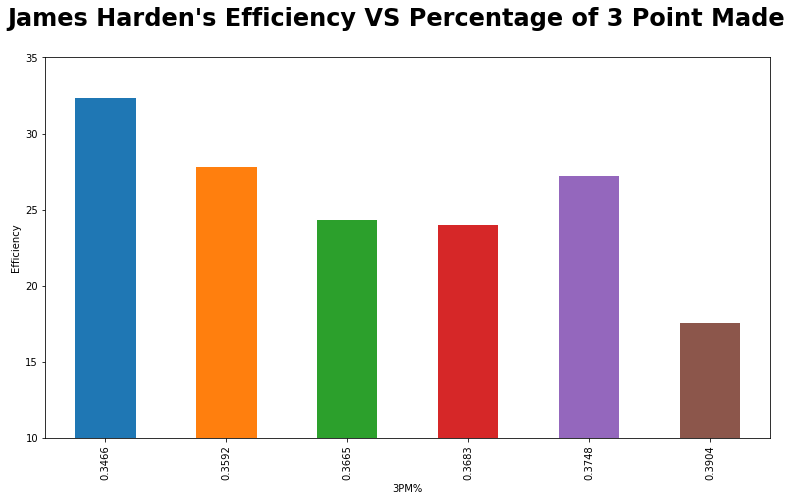

In [269]:
fig, ax = plt.subplots(figsize=(13,7))
jh = jh.sort_values(by="3PM%", ascending = True)
jh.set_index("3PM%", inplace = True)
jh.index,jh["Efficiency"].plot(kind = "bar", alpha = 1.0)
ax.set_xlabel("3PM%")
ax.set_ylabel("Efficiency")
ax.set_ylim(10,35)
fig.suptitle("James Harden's Efficiency VS Percentage of 3 Point Made",fontsize = 24, fontweight = "bold")
plt.show()

In [270]:
kd["Missed FT"] = kd["FTA"] - kd["FT"]
kd["3PA%"] = kd["3PA"] / kd["FGA"]
kd["3PM%"] = kd["3P"] / kd["3PA"]
kd["Missed FG"] = kd["FGA"] - kd["FG"]
kd['Efficiency'] = (kd['PTS'] + kd["TRB"] + kd["AST"] + kd["STL"] + kd['BLK'] - kd["Missed FG"] - kd["Missed FT"] - kd["TOV"])/kd["G"]
kd = kd.round(4)

In [271]:
kd

,Age,G,PTS,FG,FGA,3P,3PA,2P,2PA,FT,...,TRB,AST,STL,BLK,TOV,Missed FT,Missed FG,Efficiency,3PA%,3PM%
3PM%,,,,,,,,,,,,,,,,,,,,,
0.3750,28.0,62.0,1555.0,551.0,1026.0,117.0,312.0,434.0,714.0,336.0,...,513.0,300.0,66.0,99.0,138.0,48.0,475.0,30.1935,0.3041,0.3750
0.3866,23.0,66.0,1850.0,643.0,1297.0,133.0,344.0,510.0,953.0,431.0,...,527.0,231.0,88.0,77.0,248.0,70.0,654.0,27.2879,0.2652,0.3866
0.3867,27.0,72.0,2029.0,698.0,1381.0,186.0,481.0,512.0,900.0,447.0,...,589.0,361.0,69.0,85.0,250.0,51.0,683.0,29.8472,0.3483,0.3867
0.3910,25.0,81.0,2593.0,849.0,1688.0,192.0,491.0,657.0,1197.0,703.0,...,598.0,445.0,103.0,59.0,285.0,102.0,839.0,31.7531,0.2909,0.3910
0.4025,26.0,27.0,686.0,238.0,467.0,64.0,159.0,174.0,308.0,146.0,...,178.0,110.0,24.0,25.0,74.0,25.0,229.0,25.7407,0.3405,0.4025
0.4162,24.0,81.0,2280.0,731.0,1433.0,139.0,334.0,592.0,1099.0,679.0,...,640.0,374.0,116.0,105.0,280.0,71.0,702.0,30.3951,0.2331,0.4162


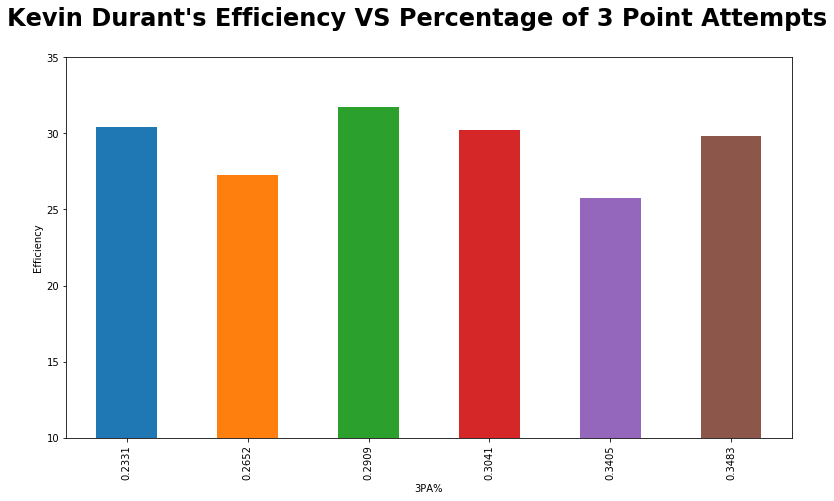

In [273]:
fig, ax = plt.subplots(figsize=(13,7))
kd = kd.sort_values(by="3PA%", ascending = True)
kd.set_index("3PA%", inplace = True)
kd.index, kd["Efficiency"].plot(kind = "bar", alpha = 1.0)
ax.set_xlabel("3PA%")
ax.set_ylabel("Efficiency")
ax.set_ylim(10,35)
fig.suptitle("Kevin Durant's Efficiency VS Percentage of 3 Point Attempts",fontsize = 24, fontweight = "bold")
plt.show()

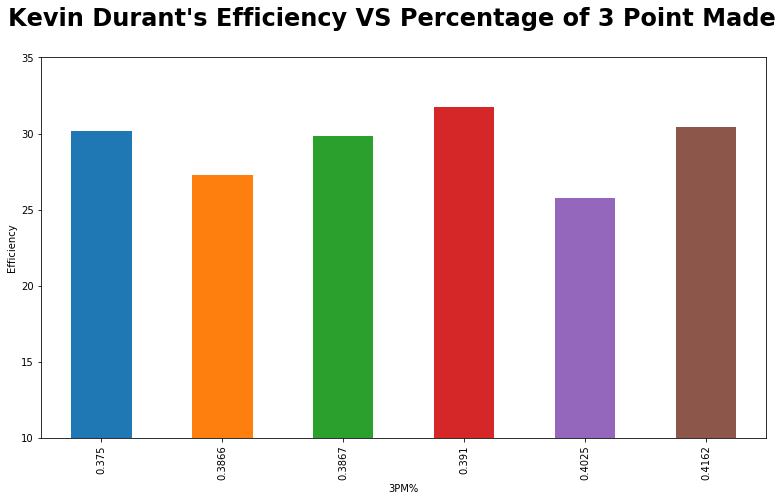

In [274]:
fig, ax = plt.subplots(figsize=(13,7))
kd = kd.sort_values(by="3PM%", ascending = True)
kd.set_index("3PM%", inplace = True)
kd.index,kd["Efficiency"].plot(kind = "bar", alpha = 1.0)
ax.set_xlabel("3PM%")
ax.set_ylabel("Efficiency")
ax.set_ylim(10,35)
fig.suptitle("Kevin Durant's Efficiency VS Percentage of 3 Point Made",fontsize = 24, fontweight = "bold")
plt.show()

Both Stephen Curry and James Harden saw their peak efficiency when they attempted the most 3 pointers, but for LeBron James his peak efficiency was when he made the highest percentage of three pointers. Kevin Durant's efficiency was all over the place, and it seemed that the three pointer had absolutely nothing to do with how efficient he was. For players like Stephen Curry and James Harden the reason why their efficiency is highest when attempting the most threes is because that's what their game relies on. They are both known in the league for being two of the best, if not the two best shooters. Whereas LeBron James is known for being an athletic monster, it is important for him to just be consistent and make the threes that he shoots, and to stick to his game, just like Kevin Durant. This is why we don't see the same high efficiency at the same high 3 points attempted. All this data shows that players who are used to shooting the three should keep shooting the three, and players who don't shoot the three shouldn't deviate from their current style of play, and instead stick to what they know and keep playing the game the way they have been.

## Conclusion

It's hard to say how likely a team can win just based on stats, and much more goes into basketball than statistics. There are many factors that cannot be described with statistics. Despite the notion that many people right now think that the three point line is making the game unfair, or that the three point line should be even further, most of the data points to the fact that the three point line hasn't been changing how much a team has been winning. Instead the three point line has allowed for players that aren't known for their athleticism to shine in another way, and players who are athletic can and should stick to playing through their athleticism because that's what allows them to be the most efficient, and brings the win to their team most often. After looking through all this data, it is important for players and teams to stay true to their identity and realize that every player and every team has certain parts of the game that they are good at, and instead of trying to adapt to the cool new thing to stick to what they know and excel at it.